In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("optical_interconnection_network.csv",header=None,na_values=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,NaN,NaN,NaN,NaN,NaN
1,64,4,UN,Client-Server,"0,1","0,839546","1,974686","308,491814","700,514102","0,352431",NaN,NaN,NaN,NaN,NaN
2,64,4,UN,Client-Server,"0,2","0,827412","9,556437","291,037663","864,599227","0,506302",NaN,NaN,NaN,NaN,NaN
3,64,4,UN,Client-Server,"0,3","0,802605","27,027618","264,928002","839,372851","0,638516",NaN,NaN,NaN,NaN,NaN
4,64,4,UN,Client-Server,"0,4","0,723403","61,848511","235,776888","1256,053108","0,767051",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,16,10,PS,Asynchronous,"0,6","0,79234","532,737732","363,094043","1214,057768","0,961042",NaN,NaN,NaN,NaN,NaN
637,16,10,PS,Asynchronous,"0,7","0,707199","751,67511","224,638088","1653,736882","0,981944",NaN,NaN,NaN,NaN,NaN
638,16,10,PS,Asynchronous,"0,8","0,61823","905,326843","206,922631","1421,304936","0,9625",NaN,NaN,NaN,NaN,NaN
639,16,10,PS,Asynchronous,"0,9","0,564482","1048,269897","154,713952","2371,043062","0,979375",NaN,NaN,NaN,NaN,NaN


In [3]:
data=pd.DataFrame(df)
data.drop(0,inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,64,4,UN,Client-Server,"0,1","0,839546","1,974686","308,491814","700,514102","0,352431",NaN,NaN,NaN,NaN,NaN
2,64,4,UN,Client-Server,"0,2","0,827412","9,556437","291,037663","864,599227","0,506302",NaN,NaN,NaN,NaN,NaN
3,64,4,UN,Client-Server,"0,3","0,802605","27,027618","264,928002","839,372851","0,638516",NaN,NaN,NaN,NaN,NaN
4,64,4,UN,Client-Server,"0,4","0,723403","61,848511","235,776888","1256,053108","0,767051",NaN,NaN,NaN,NaN,NaN
5,64,4,UN,Client-Server,"0,5","0,72121","121,085884","189,680044","1343,875577","0,807812",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,16,10,PS,Asynchronous,"0,6","0,79234","532,737732","363,094043","1214,057768","0,961042",NaN,NaN,NaN,NaN,NaN
637,16,10,PS,Asynchronous,"0,7","0,707199","751,67511","224,638088","1653,736882","0,981944",NaN,NaN,NaN,NaN,NaN
638,16,10,PS,Asynchronous,"0,8","0,61823","905,326843","206,922631","1421,304936","0,9625",NaN,NaN,NaN,NaN,NaN
639,16,10,PS,Asynchronous,"0,9","0,564482","1048,269897","154,713952","2371,043062","0,979375",NaN,NaN,NaN,NaN,NaN


In [4]:
data.isna().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10    640
11    640
12    640
13    640
14    640
dtype: int64

In [5]:
data.drop(data.columns[[4,10,11,12,13,14]],axis=1,inplace=True)
data.head()

,0,1,2,3,5,6,7,8,9
1,64,4,UN,Client-Server,"0,839546","1,974686","308,491814","700,514102","0,352431"
2,64,4,UN,Client-Server,"0,827412","9,556437","291,037663","864,599227","0,506302"
3,64,4,UN,Client-Server,"0,802605","27,027618","264,928002","839,372851","0,638516"
4,64,4,UN,Client-Server,"0,723403","61,848511","235,776888","1256,053108","0,767051"
5,64,4,UN,Client-Server,"0,72121","121,085884","189,680044","1343,875577","0,807812"


In [6]:
data.columns=['a','b','c','d','e','f','g','h','i']
data

,a,b,c,d,e,f,g,h,i
1,64,4,UN,Client-Server,"0,839546","1,974686","308,491814","700,514102","0,352431"
2,64,4,UN,Client-Server,"0,827412","9,556437","291,037663","864,599227","0,506302"
3,64,4,UN,Client-Server,"0,802605","27,027618","264,928002","839,372851","0,638516"
4,64,4,UN,Client-Server,"0,723403","61,848511","235,776888","1256,053108","0,767051"
5,64,4,UN,Client-Server,"0,72121","121,085884","189,680044","1343,875577","0,807812"
...,...,...,...,...,...,...,...,...,...
636,16,10,PS,Asynchronous,"0,79234","532,737732","363,094043","1214,057768","0,961042"
637,16,10,PS,Asynchronous,"0,707199","751,67511","224,638088","1653,736882","0,981944"
638,16,10,PS,Asynchronous,"0,61823","905,326843","206,922631","1421,304936","0,9625"
639,16,10,PS,Asynchronous,"0,564482","1048,269897","154,713952","2371,043062","0,979375"


In [7]:
data[['e1', 'e2']] = data.e.str.split(",", expand = True)
data[['f1', 'f2']] = data.f.str.split(",", expand = True)
data[['g1', 'g2']] = data.g.str.split(",", expand = True)
data[['h1', 'h2']] = data.h.str.split(",", expand = True)
data[['i1', 'i2']] = data.i.str.split(",", expand = True)


In [8]:
data

,a,b,c,d,e,f,g,h,i,e1,e2,f1,f2,g1,g2,h1,h2,i1,i2
1,64,4,UN,Client-Server,"0,839546","1,974686","308,491814","700,514102","0,352431",0,839546,1,974686,308,491814,700,514102,0,352431
2,64,4,UN,Client-Server,"0,827412","9,556437","291,037663","864,599227","0,506302",0,827412,9,556437,291,037663,864,599227,0,506302
3,64,4,UN,Client-Server,"0,802605","27,027618","264,928002","839,372851","0,638516",0,802605,27,027618,264,928002,839,372851,0,638516
4,64,4,UN,Client-Server,"0,723403","61,848511","235,776888","1256,053108","0,767051",0,723403,61,848511,235,776888,1256,053108,0,767051
5,64,4,UN,Client-Server,"0,72121","121,085884","189,680044","1343,875577","0,807812",0,72121,121,085884,189,680044,1343,875577,0,807812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,16,10,PS,Asynchronous,"0,79234","532,737732","363,094043","1214,057768","0,961042",0,79234,532,737732,363,094043,1214,057768,0,961042
637,16,10,PS,Asynchronous,"0,707199","751,67511","224,638088","1653,736882","0,981944",0,707199,751,67511,224,638088,1653,736882,0,981944
638,16,10,PS,Asynchronous,"0,61823","905,326843","206,922631","1421,304936","0,9625",0,61823,905,326843,206,922631,1421,304936,0,9625
639,16,10,PS,Asynchronous,"0,564482","1048,269897","154,713952","2371,043062","0,979375",0,564482,1048,269897,154,713952,2371,043062,0,979375


In [9]:
data.drop(data.columns[[4,5,6,7,8]],axis=1,inplace=True)
data

,a,b,c,d,e1,e2,f1,f2,g1,g2,h1,h2,i1,i2
1,64,4,UN,Client-Server,0,839546,1,974686,308,491814,700,514102,0,352431
2,64,4,UN,Client-Server,0,827412,9,556437,291,037663,864,599227,0,506302
3,64,4,UN,Client-Server,0,802605,27,027618,264,928002,839,372851,0,638516
4,64,4,UN,Client-Server,0,723403,61,848511,235,776888,1256,053108,0,767051
5,64,4,UN,Client-Server,0,72121,121,085884,189,680044,1343,875577,0,807812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,16,10,PS,Asynchronous,0,79234,532,737732,363,094043,1214,057768,0,961042
637,16,10,PS,Asynchronous,0,707199,751,67511,224,638088,1653,736882,0,981944
638,16,10,PS,Asynchronous,0,61823,905,326843,206,922631,1421,304936,0,9625
639,16,10,PS,Asynchronous,0,564482,1048,269897,154,713952,2371,043062,0,979375


In [10]:
data['c']=LabelEncoder().fit_transform(data['c'])
data['d']=LabelEncoder().fit_transform(data['d'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 1 to 640
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       640 non-null    object
 1   b       640 non-null    object
 2   c       640 non-null    int32 
 3   d       640 non-null    int32 
 4   e1      640 non-null    object
 5   e2      640 non-null    object
 6   f1      640 non-null    object
 7   f2      640 non-null    object
 8   g1      640 non-null    object
 9   g2      640 non-null    object
 10  h1      640 non-null    object
 11  h2      640 non-null    object
 12  i1      640 non-null    object
 13  i2      640 non-null    object
dtypes: int32(2), object(12)
memory usage: 65.1+ KB


In [11]:
data['a']=data['a'].astype('int')
data['b']=data['b'].astype('int')
data['e1']=data['e1'].astype('int')
data['e2']=data['e2'].astype('int')
data['f1']=data['f1'].astype('int')
data['f2']=data['f2'].astype('int')
data['g1']=data['g1'].astype('int')
data['g2']=data['g2'].astype('int')
data['h1']=data['h1'].astype('int')
data['h2']=data['h2'].astype('int')
data['i1']=data['i1'].astype('int')
data['i2']=data['i2'].astype('int')

In [12]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 1 to 640
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       640 non-null    int32
 1   b       640 non-null    int32
 2   c       640 non-null    int32
 3   d       640 non-null    int32
 4   e1      640 non-null    int32
 5   e2      640 non-null    int32
 6   f1      640 non-null    int32
 7   f2      640 non-null    int32
 8   g1      640 non-null    int32
 9   g2      640 non-null    int32
 10  h1      640 non-null    int32
 11  h2      640 non-null    int32
 12  i1      640 non-null    int32
 13  i2      640 non-null    int32
dtypes: int32(14)
memory usage: 35.1 KB


,a,b,c,d,e1,e2,f1,f2,g1,g2,h1,h2,i1,i2
1,64,4,3,1,0,839546,1,974686,308,491814,700,514102,0,352431
2,64,4,3,1,0,827412,9,556437,291,37663,864,599227,0,506302
3,64,4,3,1,0,802605,27,27618,264,928002,839,372851,0,638516
4,64,4,3,1,0,723403,61,848511,235,776888,1256,53108,0,767051
5,64,4,3,1,0,72121,121,85884,189,680044,1343,875577,0,807812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,16,10,2,0,0,79234,532,737732,363,94043,1214,57768,0,961042
637,16,10,2,0,0,707199,751,67511,224,638088,1653,736882,0,981944
638,16,10,2,0,0,61823,905,326843,206,922631,1421,304936,0,9625
639,16,10,2,0,0,564482,1048,269897,154,713952,2371,43062,0,979375


In [13]:
for i in data.columns:
    print(data[i].unique())

[64 16]
[ 4  6  8 10]
[3 1 0 2]
[1 0]
[0]
[839546 827412 802605 723403  72121 647035 567402 511627  47056 421877
 901173 897863 871957 853846 796428 731779 640211 568923 514046 463145
 923706 922138 928869 911611 850776 768916 673281 601595 538158 488247
 961658 950974 938148 934972 911155 954375 960799 626211 557324 504446
 549508 509507 531845 519655 515341 452565 381618 355369  32818 282082
 572224 557274 585218 591425 557459 517327 458381 401393 365252 338053
 567314 601986 649676 627225 609125 564138  49258 440587 409357 375879
  63489 625327 654058  66297 645673 591505 521848 490651 452518  41892
 905039 900025 883719 853155  81232 749235 675295 605546 543298 491761
   9375 935522 922333 915624 870269 796469 703475 622974 554223 500716
 948599 947834 937209   9347 908685  96125 973316 977292  97836 978299
  95829 944783 947848 942199 928141 828573 720587 636664 567883 513848
 824084 795685 739597 695053  62477 541929 487871  43976 400416 927886
 914674 897633 867957  80322 715007

In [14]:
data.drop(columns=["e1"],inplace=True)

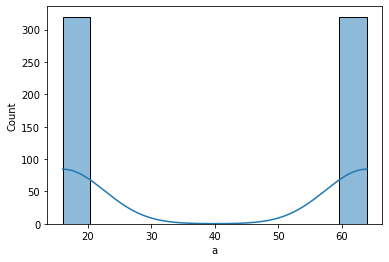

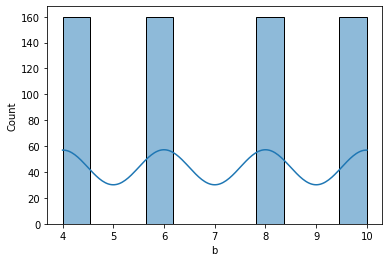

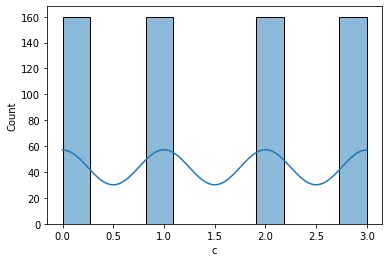

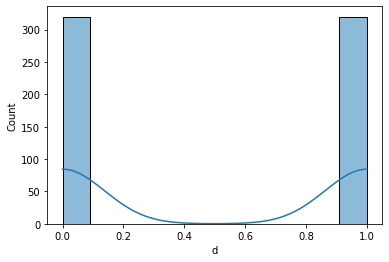

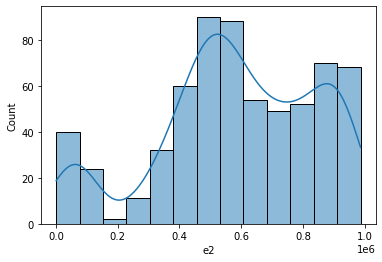

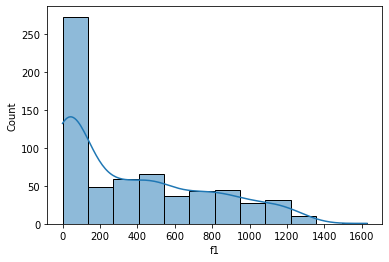

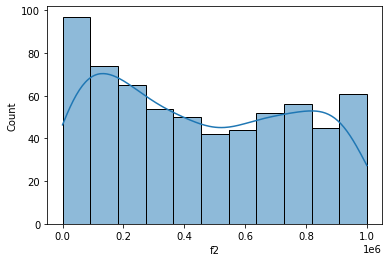

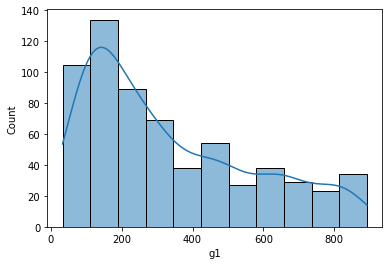

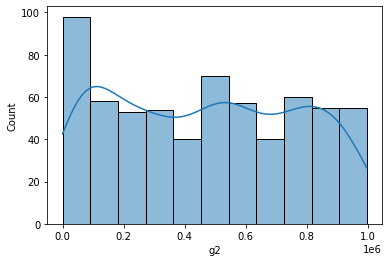

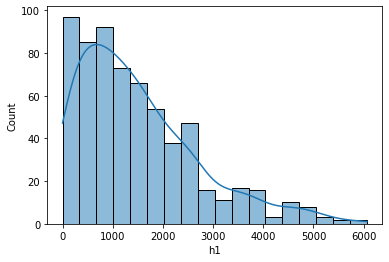

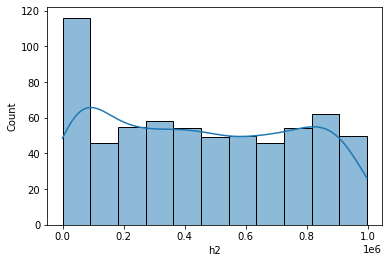

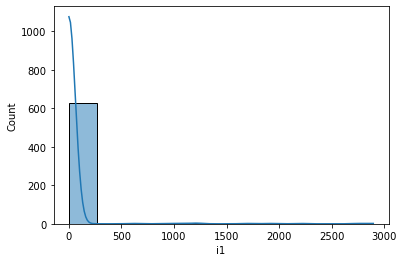

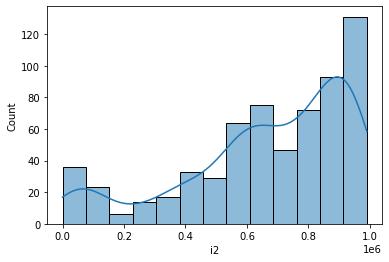

In [15]:
for i in data.columns:
    sns.histplot(data[i], kde=True)
    plt.show()

In [16]:
X=data.drop(columns=["c"])
Y=data["c"]
X

,a,b,d,e2,f1,f2,g1,g2,h1,h2,i1,i2
1,64,4,1,839546,1,974686,308,491814,700,514102,0,352431
2,64,4,1,827412,9,556437,291,37663,864,599227,0,506302
3,64,4,1,802605,27,27618,264,928002,839,372851,0,638516
4,64,4,1,723403,61,848511,235,776888,1256,53108,0,767051
5,64,4,1,72121,121,85884,189,680044,1343,875577,0,807812
...,...,...,...,...,...,...,...,...,...,...,...,...
636,16,10,0,79234,532,737732,363,94043,1214,57768,0,961042
637,16,10,0,707199,751,67511,224,638088,1653,736882,0,981944
638,16,10,0,61823,905,326843,206,922631,1421,304936,0,9625
639,16,10,0,564482,1048,269897,154,713952,2371,43062,0,979375


In [17]:
scaler = MinMaxScaler()
X =pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,1.0,0.850902,0.000615,0.975548,0.320140,0.493409,0.115416,0.515708,0.0,0.355873
1,1.0,0.0,1.0,0.838592,0.005532,0.556905,0.300349,0.037744,0.142457,0.601113,0.0,0.511251
2,1.0,0.0,1.0,0.813426,0.016595,0.027588,0.268917,0.931050,0.138335,0.373992,0.0,0.644759
3,1.0,0.0,1.0,0.733077,0.037492,0.849254,0.235157,0.779432,0.207090,0.053196,0.0,0.774553
4,1.0,0.0,1.0,0.072365,0.074370,0.085909,0.181607,0.682266,0.221434,0.878372,0.0,0.815713
...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,1.0,0.0,0.079581,0.326982,0.738371,0.384168,0.094312,0.200165,0.057872,0.0,0.970443
636,0.0,1.0,0.0,0.716639,0.461586,0.067519,0.222352,0.640170,0.272547,0.739221,0.0,0.991550
637,0.0,1.0,0.0,0.061918,0.556238,0.327095,0.201397,0.925661,0.234295,0.305853,0.0,0.009710
638,0.0,1.0,0.0,0.571855,0.644130,0.270095,0.140861,0.716287,0.390932,0.043117,0.0,0.988956


In [19]:
pd.unique(X[9])

array([5.15707521e-01, 6.01112649e-01, 3.73991693e-01, 5.31964845e-02,
       8.78372060e-01, 3.67420138e-01, 8.55913396e-01, 5.23545228e-01,
       1.96665061e-01, 1.31326752e-01, 2.18617064e-03, 6.30346537e-01,
       7.54655269e-02, 8.21293844e-02, 8.54051288e-02, 3.51282206e-02,
       4.29788707e-01, 2.53818525e-01, 8.79571996e-01, 9.91582390e-02,
       2.77987800e-01, 8.58975439e-01, 3.21268762e-01, 8.00344129e-01,
       2.19279236e-02, 4.62776908e-01, 4.95202263e-01, 1.68128461e-01,
       1.88268521e-01, 1.74928766e-01, 3.65617224e-01, 5.20205273e-01,
       2.32072197e-01, 8.48591380e-01, 8.76557107e-01, 9.78915844e-01,
       2.12656513e-01, 5.72195802e-01, 7.93347179e-01, 7.39009953e-01,
       3.35674011e-01, 5.06272574e-01, 2.40147684e-02, 7.91917489e-01,
       8.96168432e-01, 3.46220604e-01, 7.90449675e-01, 2.05243198e-02,
       9.59897464e-01, 4.75887912e-01, 1.65472751e-01, 2.00910988e-01,
       4.06874549e-01, 1.81154186e-02, 7.90508869e-01, 2.93200698e-01,
      

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [21]:
model1=SVC()

model1.fit(xtrain,ytrain)

print(accuracy_score(ytrain,model1.predict(xtrain)))

print(accuracy_score(ytest,model1.predict(xtest)))

0.6696428571428571
0.4947916666666667


In [22]:
model2=LogisticRegression()

model2.fit(xtrain,ytrain)

print(accuracy_score(ytrain,model2.predict(xtrain)))

print(accuracy_score(ytest,model2.predict(xtest)))

0.5379464285714286
0.5052083333333334


In [23]:
model3=Perceptron()

model3.fit(xtrain,ytrain)

print(accuracy_score(ytrain,model3.predict(xtrain)))

print(accuracy_score(ytest,model3.predict(xtest)))

0.38839285714285715
0.4270833333333333


In [24]:
model4=DecisionTreeClassifier(criterion="gini")

model4.fit(xtrain,ytrain)

print(accuracy_score(ytrain,model4.predict(xtrain)))

print(accuracy_score(ytest,model4.predict(xtest)))

1.0
0.609375


In [25]:
model5=DecisionTreeClassifier(criterion="entropy")

model5.fit(xtrain,ytrain)

print(accuracy_score(ytrain,model5.predict(xtrain)))

print(accuracy_score(ytest,model5.predict(xtest)))

1.0
0.6302083333333334


[Text(0.6212294884169884, 0.9583333333333334, 'X[11] <= 0.881\nentropy = 1.999\nsamples = 448\nvalue = [105, 117, 116, 110]'),
 Text(0.4201858108108108, 0.875, 'X[3] <= 0.816\nentropy = 1.955\nsamples = 322\nvalue = [80, 114, 68, 60]'),
 Text(0.3109314671814672, 0.7916666666666666, 'X[8] <= 0.341\nentropy = 1.74\nsamples = 226\nvalue = [59, 112, 33, 22]'),
 Text(0.20873552123552125, 0.7083333333333334, 'X[11] <= 0.676\nentropy = 1.88\nsamples = 171\nvalue = [57, 62, 30, 22]'),
 Text(0.10666023166023166, 0.625, 'X[11] <= 0.117\nentropy = 1.666\nsamples = 119\nvalue = [56, 41, 14, 8]'),
 Text(0.06177606177606178, 0.5416666666666666, 'X[6] <= 0.556\nentropy = 1.92\nsamples = 22\nvalue = [5, 3, 8, 6]'),
 Text(0.03861003861003861, 0.4583333333333333, 'X[6] <= 0.038\nentropy = 1.646\nsamples = 17\nvalue = [2, 1, 8, 6]'),
 Text(0.03088803088803089, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.04633204633204633, 0.375, 'X[9] <= 0.949\nentropy = 1.273\nsamples = 15\nvalue

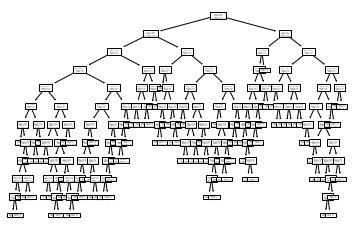

In [26]:
from sklearn.tree import plot_tree
plot_tree(model5)

In [27]:
model6=RandomForestClassifier()

model6.fit(xtrain,ytrain)

print(accuracy_score(ytrain,model6.predict(xtrain)))

print(accuracy_score(ytest,model6.predict(xtest)))

1.0
0.640625


In [28]:
skf =StratifiedKFold(n_splits=12, shuffle=True)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10)

cv_results = cross_val_score(rf_clf, xtrain, ytrain, cv=skf, scoring='accuracy')

print("Cross-validation results (Random Forest):")
print(cv_results)
print("Mean accuracy: {:.3f}".format(cv_results.mean()))

rf_clf.fit(xtrain, ytrain)

y_pred = rf_clf.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
conf_mat = confusion_matrix(ytest, y_pred)

print("Accuracy score (Random Forest): {:.3f}".format(accuracy))
print("Confusion matrix (Random Forest):")
print(conf_mat)

Cross-validation results (Random Forest):
[0.65789474 0.86842105 0.55263158 0.65789474 0.7027027  0.45945946
 0.45945946 0.59459459 0.51351351 0.56756757 0.59459459 0.48648649]
Mean accuracy: 0.593
Accuracy score (Random Forest): 0.641
Confusion matrix (Random Forest):
[[36  6  5  8]
 [ 2 39  0  2]
 [ 0  3 27 14]
 [ 3  3 23 21]]


In [29]:
dc_clf = DecisionTreeClassifier(max_depth=12)

cv_results = cross_val_score(dc_clf, xtrain, ytrain, cv=skf, scoring='accuracy')

print("Cross-validation results (Random Forest):")
print(cv_results)
print("Mean accuracy: {:.3f}".format(cv_results.mean()))

dc_clf.fit(xtrain, ytrain)

y_pred = dc_clf.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
conf_mat = confusion_matrix(ytest, y_pred)

print("Accuracy score (DecisionTreeClassifier): {:.3f}".format(accuracy))
print("Confusion matrix (DecisionTreeClassifier):")
print(conf_mat)

Cross-validation results (Random Forest):
[0.63157895 0.5        0.5        0.44736842 0.59459459 0.48648649
 0.51351351 0.54054054 0.56756757 0.45945946 0.51351351 0.64864865]
Mean accuracy: 0.534
Accuracy score (DecisionTreeClassifier): 0.599
Confusion matrix (DecisionTreeClassifier):
[[35  7  7  6]
 [ 3 33  5  2]
 [ 7  2 21 14]
 [ 7  6 11 26]]


In [30]:
from sklearn.model_selection import GridSearchCV

paramlist={'C':[0.1,1,10,100],'kernel':['linear','poly','rbf']}
grid=GridSearchCV(SVC(),paramlist)
grid.fit(xtrain,ytrain)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']})

In [31]:
print(grid.best_params_)

{'C': 10, 'kernel': 'poly'}


In [32]:
print(accuracy_score(ytest,grid.predict(xtest)))

0.5625
